# Praxisübung: Logistische Regression und Gradientenabstieg

In dieser Übung trainieren Sie ein kleines logistisches Regressionsmodell mittels Gradientenabstieg.

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

X = 
[[ 1.  -1. ]
 [ 1.  -0.8]
 [ 1.  -0.6]
 [ 1.  -0.4]
 [ 1.  -0.2]
 [ 1.   0. ]
 [ 1.   0.2]
 [ 1.   0.4]
 [ 1.   0.6]
 [ 1.   0.8]
 [ 1.   1. ]]


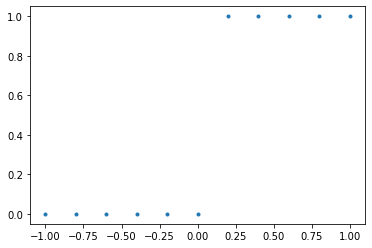

In [24]:
# Trainingsdatensatz. Dieser ist im folgenden fest, d.h. die Verlustfunktion bezieht sich 
# auf einen festen Trainingsdatensatz und wir fassen sie nur noch als Funktion von w auf.

# 2 Features: die erste Spalte sorgt dafür, dass der Koeffizienten w_0 ("Intercept") mitgeschätzt wird
X = np.array([[1,1,1,1,1,1,1,1,1,1,1],
              [-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1]]).T
y = np.array([0,0,0,0,0,0,1,1,1,1,1])

print(f"X = \n{X}")
plt.plot(X[:,1],y, ".")

In [11]:
# Logistische Funktion
def logistic(w, X):
    return 1/(1+np.exp(-X@w))

# Kreuzentropie Funktion
def L(w, X=X, y=y):
    y_hat = logistic(w, X)
    return -np.mean(y*np.log(y_hat) + (1-y)*np.log(1-y_hat))

# Ableitung der Kreuzentropie nach w
def dLdw(w, X=X, y=y):
    y_hat = logistic(w, X)
    # Elementweise Multiplikation und spaltenweiser Mittelwert ergibt Gradientenvektor
    return np.mean((y_hat-y)[:,np.newaxis]*X, axis=0)

# Algorithmus: Gradientenabstieg zur Bestimmung der Parameter w
# w0: Startwert/-schätzung für w
# alpha: Schrittweite
# n_iter: Anzahl Iterationen
# Return: w (die Koeffizienten, die L auf den Trainingsdaten minimieren)
def gradient_descent(w0, alpha, n_iter):
    w = w0
    for k in range(n_iter):
        # Gib Zielfunktionswert in jeder 1000. Iteration aus
        if k % 1000 == 0:
            print(L(w))
        w = w - alpha * dLdw(w)
    return w

## ✏ Aufgabe 1
Lassen Sie das Gradientenverfahren mit Schrittweite 1 für 10000 Iterationen laufen. 
Geben Sie am Ende die gelernten Koeffizienten aus.

In [12]:
# TO DO

## ✏ Aufgabe 2
Sagen Sie die Wahrscheinlichkeit und die Klasse (Schwellwert 0.5) für die Trainingsdaten vorher.

In [13]:
# TO DO

## ✏ Aufgabe 3
Trainieren Sie ein logistisches Regressionsmodell mit scikit-learn für denselben Datensatz. Was bedeutet der Parameter ``penalty="none"``? Lassen Sie sich auch hier die Koeffizienten ausgeben und sagen Sie Wahrscheinlichkeiten und Klasse für die Trainingsdaten vorher. Beobachten Sie Unterschiede zum Modell oben?

In [19]:
# Gegenprobe mit scikit-learn
from sklearn.linear_model import LogisticRegression
m = LogisticRegression(fit_intercept=False, penalty="none")

# TODO